# Setting


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime

from tqdm import tqdm
import time

#경고창이 뜨지 않도록 해주는 것
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 


pd.set_option('display.max_columns',None)

Text(0.3, 0.3, '한글')

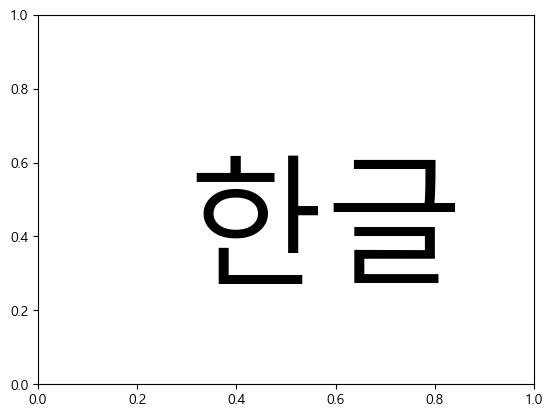

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

plt.text(0.3, 0.3, '한글', size=100)

In [29]:
# # extensions 설치

# !pip install jupyter_contrib_nbextensions

# # Nbextensions 활성화

# !jupyter contrib nbextension install --user

     ---------------------------------------- 20.9/20.9 MB 4.6 MB/s eta 0:00:00
     ------------------------------------- 467.2/467.2 kB 14.7 MB/s eta 0:00:00
     -------------------------------------- 861.7/861.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963395 sha256=ab07b0b774f58a65342eeb2513c9c832f55333829582cbae26a2945f439814e3
  Stored in directory: c:\users\jadec\appdata\local\pip\cache\wheels\f7\b5\78\f5b899dd8fc137fe0bfe26b382713f6d171c9eac2fb1fa091f
Successfully built jupyter-latex-envs


[I 16:02:30 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 16:02:30 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 16:02:30 InstallContribNbextensionsApp] Installing C:\Users\jadec\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 16:02:30 InstallContribNbextensionsApp] Making directory: C:\Users\jadec\AppData\Roaming\jupyter\nbextensions\addbefore\
[I 16:02:30 InstallContribNbextensionsApp] Copying: C:\Users\jadec\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore\addbefore.yaml -> C:\Users\jadec\AppData\Roaming\jupyter\nbextensions\addbefore\addbefore.yaml
[I 16:02:30 InstallContribNbextensionsApp] Copying: C:\Users\jadec\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore\icon.png -> C:\Users\jadec\AppData\Roaming\jupyter\nbextensions\addbefore\icon.png
[I 16:02:30 InstallContribNbe

# 농림축산식품부 농작물 재배 지역별 품목별 현황

In [1]:
import urllib.request

url='http://uni.agrix.go.kr/webportal/file/opendata/opendata09.csv'

urllib.request.urlretrieve(url,1)

(1, <http.client.HTTPMessage at 0x1d591aa1430>)

In [5]:
urllib.request.urlopen(url, data=None, cafile=None, capath=None, cadefault=False, context=None)


In [147]:
import requests
url='http://www.data.go.kr/dataset/fileDownload.do?atchFileId=FILE_000000001375425&fileDetailSn=1&publicDataDetailPk=uddi:fff6f608-f3b8-464f-be97-d58c4944e477'
r=requests.get(url,allow_redirects=True)
open('urldata.csv','wb').write(r.content)

1638

In [9]:
from urllib.request import urlopen    
response = urlopen('http://uni.agrix.go.kr/webportal/file/opendata/opendata09.csv')  
print(response)

In [144]:
from urllib.request import urlopen    

response = urlopen('http://uni.agrix.go.kr/webportal/file/opendata/opendata09.csv')
response.read().decode("euc-kr")

'시도,대분류,합계,,재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha)\r\n,,,,0.1ha미만,,0.1~0.2,,0.2~0.3,,0.3~0.5,,0.5~0.7,,0.7~1.0,,1.0~1.5,,1.5~2.0,,2.0~2.5,,2.5~3.0,,3.0~5.0,,5.0~7.0,,7.0~10.0,,10.0ha 이상,\r\n,,경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha)\r\n서울특별시,미곡류,371,157.15877,17,0.96954,54,8.5293,74,18.1787,135,52.9236,44,25.8286,23,19.13613,19,22.4744,3,4.7233,2,4.3952,0,0,0,0,0,0,0,0,0,0\r\n서울특별시,맥류,1,0.2379,0,0,0,0,1,0.2379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\r\n서울특별시,두류,236,12.55682,206,6.34937,20,2.56515,3,0.6936,5,1.8481,2,1.1006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\r\n서

In [26]:
url = 'http://uni.agrix.go.kr/webportal/file/opendata/opendata09.csv'
req = requests.get(url)
print('url을 get으로 받아온 형태는: ', req)
print('#' * 20)
html = req.text
print('get으로 받아온 후의 문자열만 추출한 것은: ', html)
print('#' * 20)

url을 get으로 받아온 형태는:  <Response [200]>
####################
get으로 받아온 후의 문자열만 추출한 것은:  시도,대분류,합계,,재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha),재배면적(ha)
,,,,0.1ha미만,,0.1~0.2,,0.2~0.3,,0.3~0.5,,0.5~0.7,,0.7~1.0,,1.0~1.5,,1.5~2.0,,2.0~2.5,,2.5~3.0,,3.0~5.0,,5.0~7.0,,7.0~10.0,,10.0ha 이상,
,,경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha),경영체수(건),면적합계(ha)
서울특별시,미곡류,371,157.15877,17,0.96954,54,8.5293,74,18.1787,135,52.9236,44,25.8286,23,19.13613,19,22.4744,3,4.7233,2,4.3952,0,0,0,0,0,0,0,0,0,0
서울특별시,맥류,1,0.2379,0,0,0,0,1,0.2379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
서울특별시,두류,236,12.55682,206,6.34937,20,2.565

In [ ]:
# 농작물 재배 지역별 품목별 현황 -> 각 과일에 대한 내용 아니라 '과채류'식으로 된 파일
# https://www.data.go.kr/data/15072590/fileData.do?recommendDataYn=Y

# 국가 농식품 통계 서비스 - 농림축산식품주요통계 - 경제작물 - 과실류 생산량

In [8]:
#면적 천ha, 생산량 천t 기준

df = pd.read_csv('C:/Users/jadec/Desktop/DAV/DAV_fruits_19702020.csv', encoding = 'utf-8')

In [11]:
df.columns = ['시점', '계_면적', '계_생산량', '사과_면적', '사과_생산량', '배_면적', '배_생산량', '포도_면적', '포도_생산량', '복숭아_면적', '복숭아_생산량', '감귤_면적', '감귤_생산량', '기타_면적', '기타_생산량']

In [14]:
df.head()

,시점,계_면적,계_생산량,사과_면적,사과_생산량,배_면적,배_생산량,포도_면적,포도_생산량,복숭아_면적,복숭아_생산량,감귤_면적,감귤_생산량,기타_면적,기타_생산량
0,시점,면 적 (천ha),생산량 (천t),면 적 (천ha),생산량 (천t),면 적 (천ha),생산량 (천t),면 적 (천ha),생산량 (천t),면 적 (천ha),생산량 (천t),면 적 (천ha),생산량 (천t),면 적 (천ha),생산량 (천t)
1,1970,60,423,21,212,7,52,6,34,12,78,6,5,8,42
2,1975,74,543,31,280,9,49,7,50,9,61,9,67,8,36
3,1980,99,833,46,410,9,60,8,57,10,89,12,161,14,57
4,1985,109,1464,38,533,9,128,16,150,13,132,16,371,17,151


In [15]:
df.drop([0], axis = 0)

,시점,계_면적,계_생산량,사과_면적,사과_생산량,배_면적,배_생산량,포도_면적,포도_생산량,복숭아_면적,복숭아_생산량,감귤_면적,감귤_생산량,기타_면적,기타_생산량
1,1970,60,423,21,212,7,52,6,34,12,78,6,5,8,42
2,1975,74,543,31,280,9,49,7,50,9,61,9,67,8,36
3,1980,99,833,46,410,9,60,8,57,10,89,12,161,14,57
4,1985,109,1464,38,533,9,128,16,150,13,132,16,371,17,151
5,1990,133,1766,49,629,9,159,15,131,12,115,19,493,29,239
6,1995,174,2300,50,716,16,178,26,316,10,130,24,615,48,345
7,2000,173,2429,29,489,26,324,29,476,14,170,27,563,48,406
8,2005,160,2611,27,368,22,443,22,381,15,224,22,638,52,557
9,2006,157,2499,28,408,21,431,19,330,13,194,21,620,54,516
10,2007,159,2752,29,436,20,467,19,329,13,184,21,778,56,558


In [ ]:
# 참고자료 


# 경상북도 경상북도_과실별 생산량 조사 현황_20171231.csv
http://data.gb.go.kr/page.do?mnu_uid=106&set_uid=392&step=2
    
    

# 통계청, 농작물 생산조사, 과실생산량(성과수+미과수)

In [19]:
df = pd.read_csv('C:/Users/jadec/Desktop/DAV/DAV_fruits_indetail.csv', encoding = 'euc-kr')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   시도별              691 non-null    object 
 1   시점               691 non-null    object 
 2   합계:면적[ha]        683 non-null    float64
 3   생산량[톤]           683 non-null    float64
 4   사과:면적[ha]        651 non-null    float64
 5   10a당 생산량[kg]     650 non-null    float64
 6   생산량[톤].1         650 non-null    float64
 7   배:면적[ha]         666 non-null    float64
 8   10a당 생산량[kg].1   665 non-null    float64
 9   생산량[톤].2         665 non-null    float64
 10  복숭아:면적[ha]       668 non-null    float64
 11  10a당 생산량[kg].2   667 non-null    float64
 12  생산량[톤].3         667 non-null    float64
 13  포도:면적[ha]        670 non-null    float64
 14  10a당 생산량[kg].3   670 non-null    float64
 15  생산량[톤].4         670 non-null    float64
 16  감귤:면적[ha]        560 non-null    float64
 17  10a당 생산량[kg].4  

In [25]:
df.head()

,시도별,시점,합계:면적[ha],생산량[톤],사과:면적[ha],10a당 생산량[kg],생산량[톤].1,배:면적[ha],10a당 생산량[kg].1,생산량[톤].2,복숭아:면적[ha],10a당 생산량[kg].2,생산량[톤].3,포도:면적[ha],10a당 생산량[kg].3,생산량[톤].4,감귤:면적[ha],10a당 생산량[kg].4,생산량[톤].5,감:면적[ha],10a당 생산량[kg].5,생산량[톤].6,단감:면적[ha],10a당 생산량[kg].6,생산량[톤].7,떫은감:면적[ha],10a당 생산량[kg].7,생산량[톤].8,자두:면적[ha],10a당 생산량[kg].8,생산량[톤].9,매실:면적[ha],10a당 생산량[kg].9,생산량[톤].10,기타:면적[ha],10a당 생산량[kg].10,생산량[톤].11,Unnamed: 37
0,계,1980 년,99093.5,833080.0,46132.1,889.0,410046.5,9164.0,650.0,59570.1,10359.4,856.0,88691.9,7653.6,742.0,56764.4,12205.1,1323.0,161433.5,6589.6,483.0,31836.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6989.7,354.0,24736.7,NaN
1,계,1981 년,100219.0,1026395.0,46685.0,1121.0,523145.0,9311.0,769.0,71596.0,10195.0,870.0,88740.0,9186.0,781.0,71724.0,12579.0,1659.0,208654.0,7621.0,515.0,39254.0,NaN,NaN,NaN,NaN,NaN,NaN,2919.0,612.0,17859.0,NaN,NaN,NaN,1723.0,315.0,5423.0,NaN
2,계,1982 년,101273.0,1194373.0,42740.0,1233.0,527141.0,9713.0,993.0,96447.0,9668.0,940.0,90870.0,11162.0,849.0,94809.0,13632.0,2045.0,278784.0,7783.0,743.0,57808.0,NaN,NaN,NaN,NaN,NaN,NaN,3460.0,684.0,23658.0,NaN,NaN,NaN,3115.0,798.0,24857.0,NaN
3,계,1983 년,105469.0,1399708.0,41297.0,1419.0,586023.0,9802.0,1085.0,106304.0,10732.0,924.0,99199.0,14165.0,926.0,131111.0,14838.0,2228.0,330623.0,8207.0,1109.0,91052.0,NaN,NaN,NaN,NaN,NaN,NaN,3683.0,820.0,30203.0,NaN,NaN,NaN,2745.0,918.0,25193.0,NaN
4,계,1984 년,106927.0,1228708.0,39189.0,1348.0,528175.0,9041.0,1122.0,101448.0,11820.0,831.0,98174.0,15514.0,804.0,124676.0,15450.0,1690.0,261129.0,9296.0,740.0,68812.0,NaN,NaN,NaN,NaN,NaN,NaN,3854.0,744.0,28660.0,NaN,NaN,NaN,2763.0,638.0,17634.0,NaN


In [26]:
a = ['시도별', '시점', '합계_면적', '합계_생산량']
fname = ['사과', '배', '복숭아', '포도', '감귤', '감', '단감', '떫은감', '자두', '매실', '기타']
lname = ['_면적', '_10a생산량', '_생산량']

for f in fname:
    for l in lname:
        a.append(f+l)

In [28]:
a.append('unknown')

In [29]:
df.columns = a

In [31]:
df.head(1)

,시도별,시점,합계_면적,합계_생산량,사과_면적,사과_10a생산량,사과_생산량,배_면적,배_10a생산량,배_생산량,복숭아_면적,복숭아_10a생산량,복숭아_생산량,포도_면적,포도_10a생산량,포도_생산량,감귤_면적,감귤_10a생산량,감귤_생산량,감_면적,감_10a생산량,감_생산량,단감_면적,단감_10a생산량,단감_생산량,떫은감_면적,떫은감_10a생산량,떫은감_생산량,자두_면적,자두_10a생산량,자두_생산량,매실_면적,매실_10a생산량,매실_생산량,기타_면적,기타_10a생산량,기타_생산량,unknown
0,계,1980 년,99093.5,833080.0,46132.1,889.0,410046.5,9164.0,650.0,59570.1,10359.4,856.0,88691.9,7653.6,742.0,56764.4,12205.1,1323.0,161433.5,6589.6,483.0,31836.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6989.7,354.0,24736.7,NaN


In [37]:
df = df.drop(labels = ['unknown'], axis = 1)

In [38]:
df['시점'] = df['시점'].apply(lambda x: x[:-1])

In [39]:
df.head(1)

,시도별,시점,합계_면적,합계_생산량,사과_면적,사과_10a생산량,사과_생산량,배_면적,배_10a생산량,배_생산량,복숭아_면적,복숭아_10a생산량,복숭아_생산량,포도_면적,포도_10a생산량,포도_생산량,감귤_면적,감귤_10a생산량,감귤_생산량,감_면적,감_10a생산량,감_생산량,단감_면적,단감_10a생산량,단감_생산량,떫은감_면적,떫은감_10a생산량,떫은감_생산량,자두_면적,자두_10a생산량,자두_생산량,매실_면적,매실_10a생산량,매실_생산량,기타_면적,기타_10a생산량,기타_생산량
0,계,1980,99093.5,833080.0,46132.1,889.0,410046.5,9164.0,650.0,59570.1,10359.4,856.0,88691.9,7653.6,742.0,56764.4,12205.1,1323.0,161433.5,6589.6,483.0,31836.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6989.7,354.0,24736.7


In [40]:
df['시점'].astype(int)

0      1980
1      1981
2      1982
3      1983
4      1984
       ... 
686    2017
687    2018
688    2019
689    2020
690    2021
Name: 시점, Length: 691, dtype: int32

In [ ]:
# csv 파일로 내보내기

# df.to_csv('C:/Users/jadec/Desktop/DAV/DAV_fruitproduction_preprocessed.csv', encoding = 'euc-kr', index = False)
# test = pd.read_csv('C:/Users/jadec/Desktop/DAV/DAV_fruitproduction_preprocessed.csv', encoding = 'euc-kr')
# test.head()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시도별         691 non-null    object 
 1   시점          691 non-null    object 
 2   합계_면적       683 non-null    float64
 3   합계_생산량      683 non-null    float64
 4   사과_면적       651 non-null    float64
 5   사과_10a생산량   650 non-null    float64
 6   사과_생산량      650 non-null    float64
 7   배_면적        666 non-null    float64
 8   배_10a생산량    665 non-null    float64
 9   배_생산량       665 non-null    float64
 10  복숭아_면적      668 non-null    float64
 11  복숭아_10a생산량  667 non-null    float64
 12  복숭아_생산량     667 non-null    float64
 13  포도_면적       670 non-null    float64
 14  포도_10a생산량   670 non-null    float64
 15  포도_생산량      670 non-null    float64
 16  감귤_면적       560 non-null    float64
 17  감귤_10a생산량   560 non-null    float64
 18  감귤_생산량      560 non-null    float64
 19  감_면적        664 non-null    f

In [94]:
df['시도별'].unique()

array(['계', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주도'], dtype=object)

In [134]:
# 주의할 점은 스케일 차이가 큼
# 전반적인 작황 추세를 봐야함

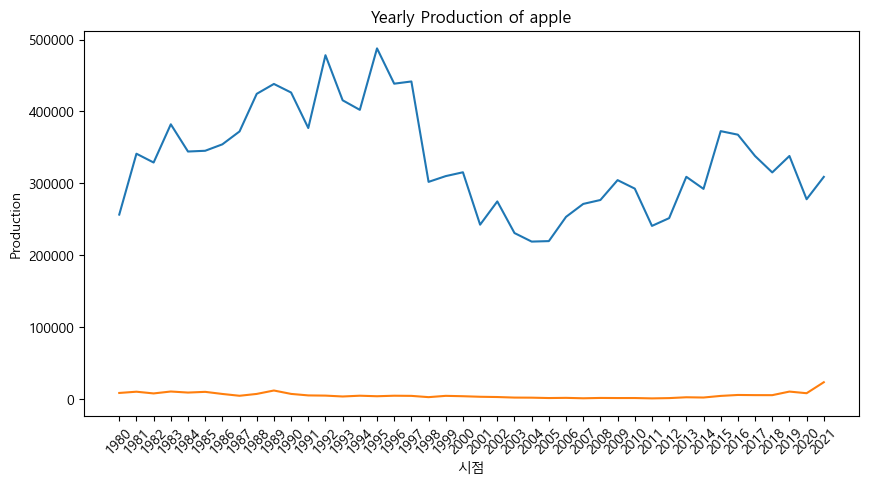

In [133]:
temp = df[(df['시도별'] =='경상북도')]
type = '사과'
fig, ax = plt.subplots(figsize = (10, 5))

p1 = ax.plot(df[(df['시도별'] =='경상북도')]['시점'], df[(df['시도별'] =='경상북도')]['사과_생산량']) #blue
# p2 = ax.plot(df[(df['시도별'] =='경상남도')]['시점'], df[(df['시도별'] =='경상남도')]['사과_생산량']) #orange
# p3 = ax.plot(df[(df['시도별'] =='전라북도')]['시점'], df[(df['시도별'] =='전라북도')]['사과_생산량']) #green
# p4 = ax.plot(df[(df['시도별'] =='충청남도')]['시점'], df[(df['시도별'] =='충청남도')]['사과_생산량']) #red
# p4 = ax.plot(df[(df['시도별'] =='충청북도')]['시점'], df[(df['시도별'] =='충청북도')]['사과_생산량']) #purple
# p4 = ax.plot(df[(df['시도별'] =='경기도')]['시점'], df[(df['시도별'] =='경기도')]['사과_생산량']) # brown
# p4 = ax.plot(df[(df['시도별'] =='전라남도')]['시점'], df[(df['시도별'] =='전라남도')]['사과_생산량']) #pink
p4 = ax.plot(df[(df['시도별'] =='강원도')]['시점'], df[(df['시도별'] =='강원도')][type+'_생산량']) #pink

ax.set_ylabel('Production')
ax.set_title('Yearly Production of apple')
ax.set_xlabel('시점')

ax.set_xticklabels(labels = temp['시점'].to_list(), rotation = 45)

plt.show()

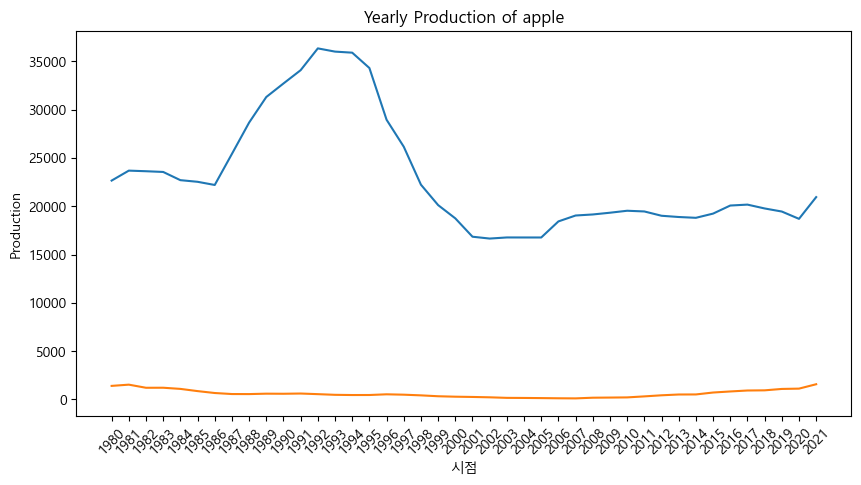

In [130]:
temp = df[(df['시도별'] =='경상북도')]
type = '사과'

fig, ax = plt.subplots(figsize = (10, 5))

p1 = ax.plot(df[(df['시도별'] =='경상북도')]['시점'], df[(df['시도별'] =='경상북도')]['사과_면적']) #blue
# p2 = ax.plot(df[(df['시도별'] =='경상남도')]['시점'], df[(df['시도별'] =='경상남도')]['사과_면적']) #orange
# p3 = ax.plot(df[(df['시도별'] =='전라북도')]['시점'], df[(df['시도별'] =='전라북도')]['사과_면적']) #green
# p4 = ax.plot(df[(df['시도별'] =='충청남도')]['시점'], df[(df['시도별'] =='충청남도')]['사과_면적']) #red
# p4 = ax.plot(df[(df['시도별'] =='충청북도')]['시점'], df[(df['시도별'] =='충청북도')]['사과_면적']) #purple
# p4 = ax.plot(df[(df['시도별'] =='경기도')]['시점'], df[(df['시도별'] =='경기도')]['사과_면적']) # brown
# p4 = ax.plot(df[(df['시도별'] =='전라남도')]['시점'], df[(df['시도별'] =='전라남도')]['사과_면적']) #pink
p4 = ax.plot(df[(df['시도별'] =='강원도')]['시점'], df[(df['시도별'] =='강원도')][type+'_면적']) #pink

ax.set_ylabel('Production')
ax.set_title('Yearly Production of apple')
ax.set_xlabel('시점')

ax.set_xticklabels(labels = temp['시점'].to_list(), rotation = 45)

plt.show()

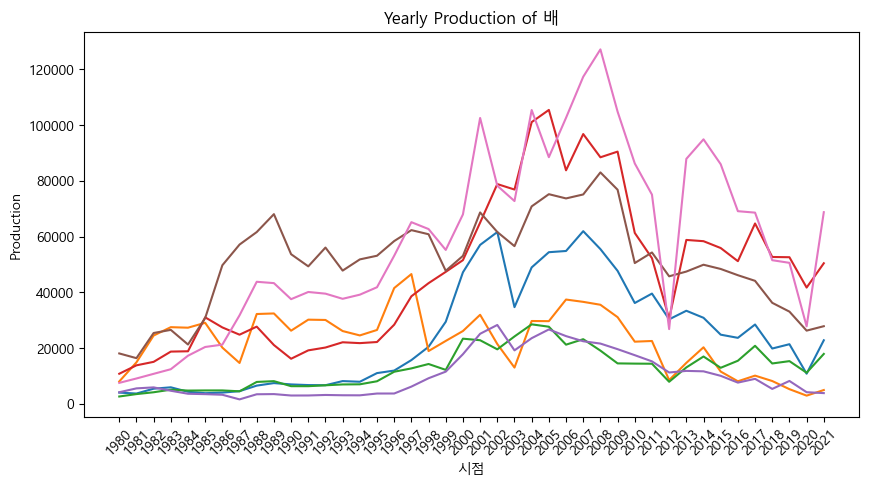

In [113]:
temp = df[(df['시도별'] =='경상북도')]
type = '배'

fig, ax = plt.subplots(figsize = (10, 5))

p1 = ax.plot(df[(df['시도별'] =='경상북도')]['시점'], df[(df['시도별'] =='경상북도')][type+'_생산량']) #blue
p2 = ax.plot(df[(df['시도별'] =='경상남도')]['시점'], df[(df['시도별'] =='경상남도')][type+'_생산량']) #orange
p3 = ax.plot(df[(df['시도별'] =='전라북도')]['시점'], df[(df['시도별'] =='전라북도')][type+'_생산량']) #green
p4 = ax.plot(df[(df['시도별'] =='충청남도')]['시점'], df[(df['시도별'] =='충청남도')][type+'_생산량']) #red
p4 = ax.plot(df[(df['시도별'] =='충청북도')]['시점'], df[(df['시도별'] =='충청북도')][type+'_생산량']) #purple
p4 = ax.plot(df[(df['시도별'] =='경기도')]['시점'], df[(df['시도별'] =='경기도')][type+'_생산량']) # brown
p4 = ax.plot(df[(df['시도별'] =='전라남도')]['시점'], df[(df['시도별'] =='전라남도')][type+'_생산량']) #pink


ax.set_ylabel('Production')
ax.set_title('Yearly Production of '+type)
ax.set_xlabel('시점')

ax.set_xticklabels(labels = temp['시점'].to_list(), rotation = 45)

plt.show()

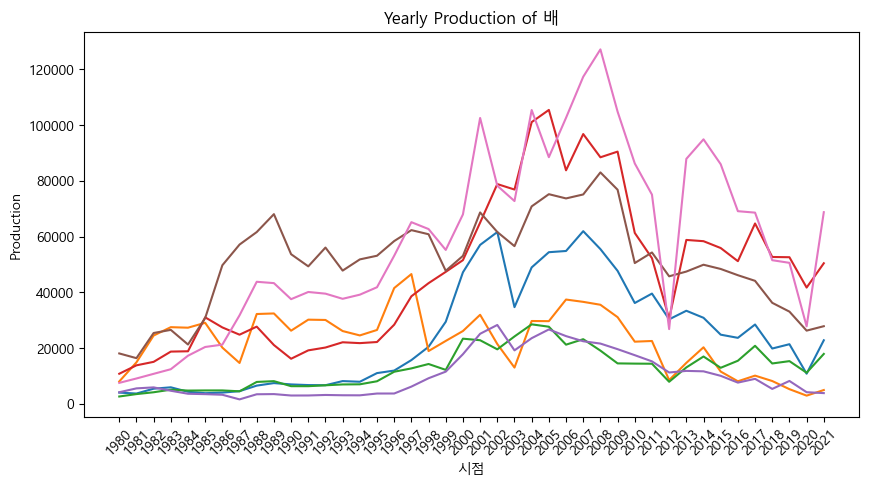

In [112]:
temp = df[(df['시도별'] =='경상북도')]
type = '배'

fig, ax = plt.subplots(figsize = (10, 5))

p1 = ax.plot(df[(df['시도별'] =='경상북도')]['시점'], df[(df['시도별'] =='경상북도')][type+'_생산량']) #blue
p2 = ax.plot(df[(df['시도별'] =='경상남도')]['시점'], df[(df['시도별'] =='경상남도')][type+'_생산량']) #orange
p3 = ax.plot(df[(df['시도별'] =='전라북도')]['시점'], df[(df['시도별'] =='전라북도')][type+'_생산량']) #green
p4 = ax.plot(df[(df['시도별'] =='충청남도')]['시점'], df[(df['시도별'] =='충청남도')][type+'_생산량']) #red
p4 = ax.plot(df[(df['시도별'] =='충청북도')]['시점'], df[(df['시도별'] =='충청북도')][type+'_생산량']) #purple
p4 = ax.plot(df[(df['시도별'] =='경기도')]['시점'], df[(df['시도별'] =='경기도')][type+'_생산량']) # brown
p4 = ax.plot(df[(df['시도별'] =='전라남도')]['시점'], df[(df['시도별'] =='전라남도')][type+'_생산량']) #pink

ax.set_ylabel('Production')
ax.set_title('Yearly Production of '+type)
ax.set_xlabel('시점')

ax.set_xticklabels(labels = temp['시점'].to_list(), rotation = 45)

plt.show()

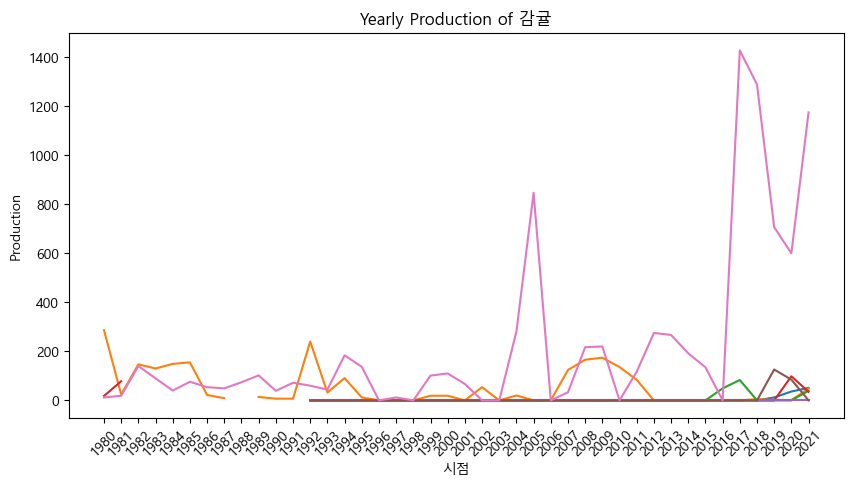

In [111]:
temp = df[(df['시도별'] =='경상북도')]
type = '감귤'

fig, ax = plt.subplots(figsize = (10, 5))

p1 = ax.plot(df[(df['시도별'] =='경상북도')]['시점'], df[(df['시도별'] =='경상북도')][type+'_생산량']) #blue
p2 = ax.plot(df[(df['시도별'] =='경상남도')]['시점'], df[(df['시도별'] =='경상남도')][type+'_생산량']) #orange
p3 = ax.plot(df[(df['시도별'] =='전라북도')]['시점'], df[(df['시도별'] =='전라북도')][type+'_생산량']) #green
p4 = ax.plot(df[(df['시도별'] =='충청남도')]['시점'], df[(df['시도별'] =='충청남도')][type+'_생산량']) #red
p4 = ax.plot(df[(df['시도별'] =='충청북도')]['시점'], df[(df['시도별'] =='충청북도')][type+'_생산량']) #purple
p4 = ax.plot(df[(df['시도별'] =='경기도')]['시점'], df[(df['시도별'] =='경기도')][type+'_생산량']) # brown
p4 = ax.plot(df[(df['시도별'] =='전라남도')]['시점'], df[(df['시도별'] =='전라남도')][type+'_생산량']) #pink

ax.set_ylabel('Production')
ax.set_title('Yearly Production of '+type)
ax.set_xlabel('시점')

ax.set_xticklabels(labels = temp['시점'].to_list(), rotation = 45)

plt.show()

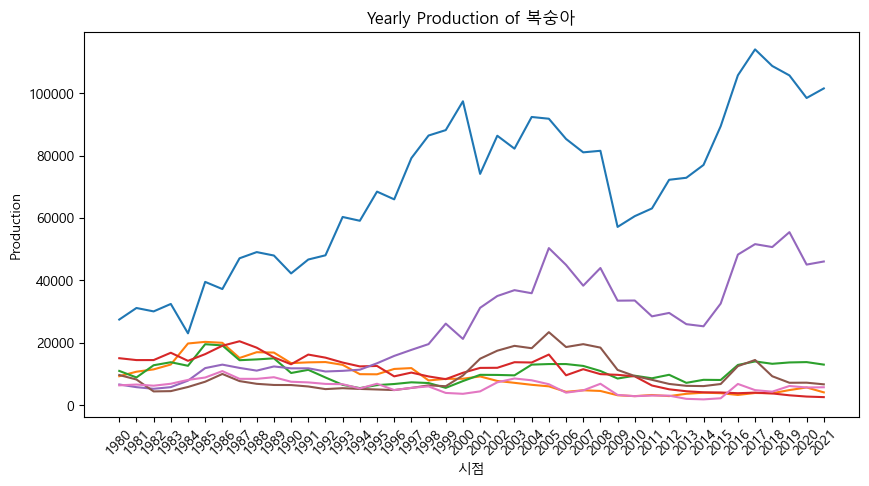

In [109]:
temp = df[(df['시도별'] =='경상북도')]
type = '복숭아'

fig, ax = plt.subplots(figsize = (10, 5))

p1 = ax.plot(df[(df['시도별'] =='경상북도')]['시점'], df[(df['시도별'] =='경상북도')][type+'_생산량']) #blue
p2 = ax.plot(df[(df['시도별'] =='경상남도')]['시점'], df[(df['시도별'] =='경상남도')][type+'_생산량']) #orange
p3 = ax.plot(df[(df['시도별'] =='전라북도')]['시점'], df[(df['시도별'] =='전라북도')][type+'_생산량']) #green
p4 = ax.plot(df[(df['시도별'] =='충청남도')]['시점'], df[(df['시도별'] =='충청남도')][type+'_생산량']) #red
p4 = ax.plot(df[(df['시도별'] =='충청북도')]['시점'], df[(df['시도별'] =='충청북도')][type+'_생산량']) #purple
p4 = ax.plot(df[(df['시도별'] =='경기도')]['시점'], df[(df['시도별'] =='경기도')][type+'_생산량']) # brown
p4 = ax.plot(df[(df['시도별'] =='전라남도')]['시점'], df[(df['시도별'] =='전라남도')][type+'_생산량']) #pink

ax.set_ylabel('Production')
ax.set_title('Yearly Production of '+type)
ax.set_xlabel('시점')

ax.set_xticklabels(labels = temp['시점'].to_list(), rotation = 45)

plt.show()

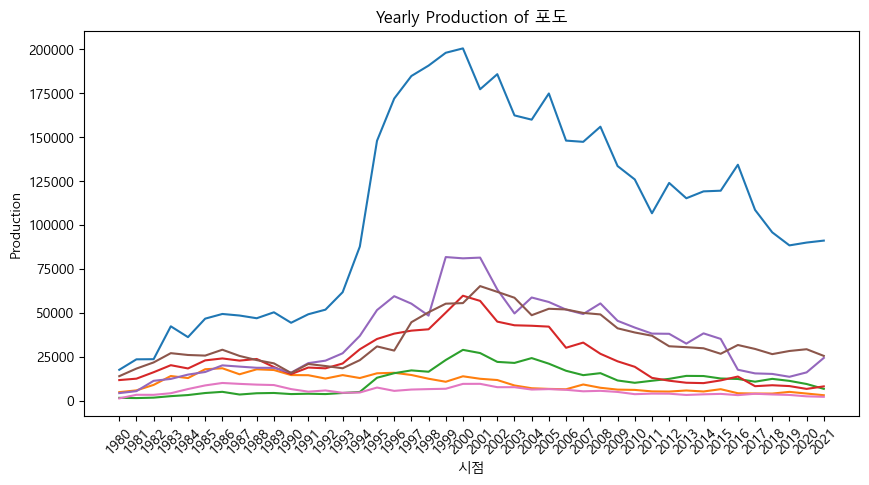

In [110]:
temp = df[(df['시도별'] =='경상북도')]
type = '포도'

fig, ax = plt.subplots(figsize = (10, 5))

p1 = ax.plot(df[(df['시도별'] =='경상북도')]['시점'], df[(df['시도별'] =='경상북도')][type+'_생산량']) #blue
p2 = ax.plot(df[(df['시도별'] =='경상남도')]['시점'], df[(df['시도별'] =='경상남도')][type+'_생산량']) #orange
p3 = ax.plot(df[(df['시도별'] =='전라북도')]['시점'], df[(df['시도별'] =='전라북도')][type+'_생산량']) #green
p4 = ax.plot(df[(df['시도별'] =='충청남도')]['시점'], df[(df['시도별'] =='충청남도')][type+'_생산량']) #red
p4 = ax.plot(df[(df['시도별'] =='충청북도')]['시점'], df[(df['시도별'] =='충청북도')][type+'_생산량']) #purple
p4 = ax.plot(df[(df['시도별'] =='경기도')]['시점'], df[(df['시도별'] =='경기도')][type+'_생산량']) # brown
p4 = ax.plot(df[(df['시도별'] =='전라남도')]['시점'], df[(df['시도별'] =='전라남도')][type+'_생산량']) #pink

ax.set_ylabel('Production')
ax.set_title('Yearly Production of '+type)
ax.set_xlabel('시점')

ax.set_xticklabels(labels = temp['시점'].to_list(), rotation = 45)

plt.show()